## DS 5220 - Project : Data Processing, EDA and Modelling (Linear Regression, Random Forest, XGBoost)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#### Importing datasets

In [38]:
t = pd.read_csv("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Summer 2021/DS 5220/Project/train.csv")
test = pd.read_csv("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Summer 2021/DS 5220/Project/test.csv")

#### Data Preprocessing

In [39]:
t.describe()

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,...,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,8.563870e+05,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,...,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.00000,856387.000000
mean,2.349550e+06,833.283384,39.618965,-77.916488,12.431234,0.277880,9.104808,1.755596,5.403592,7.722655,...,3.181096,9.162174,12.722165,18.926085,34.201656,6.765856,20.285128,28.837113,44.27231,83.991313
std,2.472178e+05,654.308913,2.935437,5.952959,6.071843,0.447954,1.991094,7.146549,12.981674,15.685910,...,11.835994,20.446568,24.219271,29.851797,41.130668,29.535968,59.202108,75.217343,102.03225,160.709797
min,1.921357e+06,0.000000,33.649973,-87.862288,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.135454e+06,291.000000,39.936739,-84.387607,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.349550e+06,679.000000,39.982974,-75.175055,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.00000,60.400000
75%,2.563646e+06,1264.000000,41.910047,-75.100495,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,22.000000,31.000000,49.000000,0.000000,0.000000,53.100000,64.20000,85.950000
max,2.777743e+06,2875.000000,42.381782,-71.025550,23.000000,1.000000,12.000000,298.000000,375.000000,375.000000,...,337.000000,356.000000,356.000000,357.000000,359.000000,1901.900000,2844.400000,2851.100000,3282.40000,4079.200000


In [40]:
t.dropna()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856382,2777739,1990,39.938232,-75.149930,South 4th Street,Catharine Street,S,W,17,1,...,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,75.5,Philadelphia
856383,2777740,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,18,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856384,2777741,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856385,2777742,1990,39.938232,-75.149930,Catharine Street,Catharine Street,W,W,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia


In [41]:
t['EntryHeading'].unique()
t['ExitHeading'].unique()

array(['NW', 'SE', 'NE', 'SW', 'W', 'E', 'N', 'S'], dtype=object)

In [42]:
t['City'].unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [43]:
t['EntryStreetName'].unique()

array(['Marietta Boulevard Northwest', nan, 'Peachtree Street Southwest',
       ..., 'Spring Garden Tunnel', 'Lindley Avenue', 'Rorer Street'],
      dtype=object)

In [44]:
# Removing null values
t = t[t['EntryStreetName'].isnull() == False]

In [45]:
t = t[t['ExitStreetName'].isnull() == False]

In [46]:
t['EntryStreetName'].isnull().sum()

0

In [47]:
t['ExitStreetName'].isnull().sum()

0

#### EDA

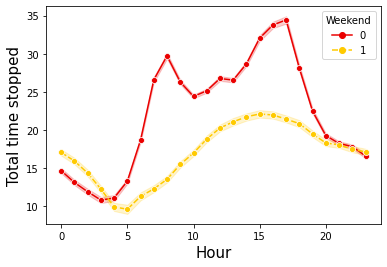

In [48]:
sns.lineplot(y = "TotalTimeStopped_p80", x = "Hour", data = t, hue = "Weekend",style = "Weekend", palette = "hot", markers = ["o", "o"],  legend="brief")
plt.xlabel("Hour", fontsize = 15) 
plt.ylabel("Total time stopped", fontsize = 15) 
plt.show()

<ipython-input-49-e2c85677755c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['Typeofstreet'] = te['EntryStreetName'].apply(func_to_encode)
<ipython-input-49-e2c85677755c>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['time'] = val
<ipython-input-49-e2c85677755c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

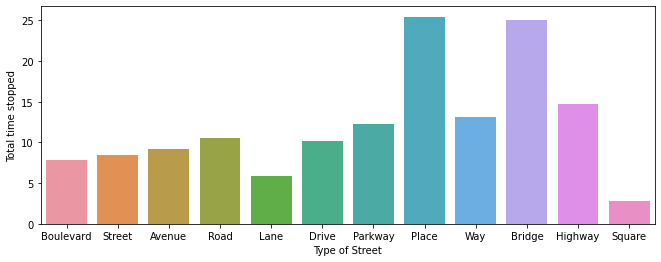

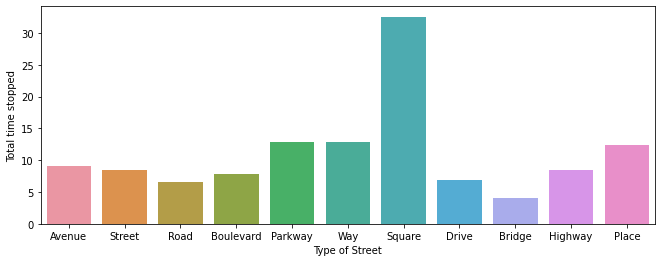

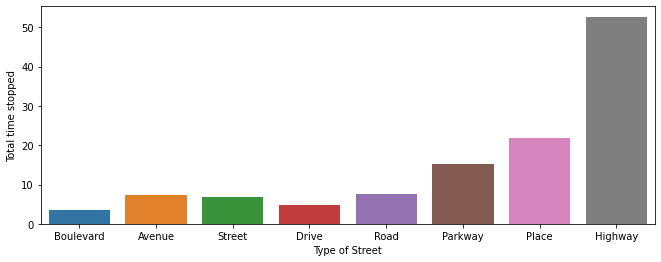

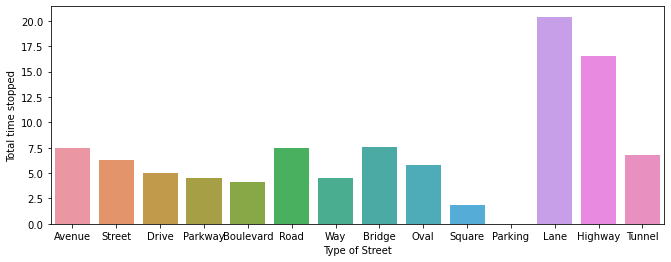

In [49]:
#Alphabetical Order
encoding_of_road_typ = {
     "Avenue":"Avenue",
     "Ave":"Avenue",
     "Boulevard":"Boulevard",
     "Bridge":"Bridge",
     "Drive":"Drive",
     "Highway":"Highway",
     "Lane":"Lane",
     "Oval":"Oval",
     "Parking":"Parking",
     "Parkway":"Parkway",
     "Place":"Place",
     "Road":"Road",
     "St":"Street",
     "Street":"Street",
     "Square":"Square",
     "Tunnel":"Tunnel",
      "Way":"Way"   
}

def func_to_encode(y):
    if pd.isna(y):
        return "Street"
    for r in encoding_of_road_typ.keys():
        if r in y:
            return encoding_of_road_typ[r]
    return "Street"

for c in t['City'].unique():
    te = t[t['City'] == c]
    te['Typeofstreet'] = te['EntryStreetName'].apply(func_to_encode)
    val= te.sort_values('Typeofstreet').groupby(by=['Hour', 'Typeofstreet'])['TotalTimeStopped_p50'].transform(lambda x: x.mean())
    te['time'] = val
    fig, a = plt.subplots(figsize=(11,4))
    a = sns.barplot(x='Typeofstreet', y='time', data=te, ax=a, ci=None)
    a.set_ylabel('Total time stopped')
    a.set_xlabel('Type of Street')
    

#### Data Encoding for categorical values

In [50]:
encodingofaddresses = {
     "Ave": 0,
     "Avenue": 0,
     "Bld": 1,
     "Boulevard": 1,
     "Bridge": 2,
     "Circle": 3,
     "Court": 4,
     "Drive": 5,
     "Highway": 6,
     "Lane": 7,
     "Mall": 8,
     "Oval": 9,
     "Overpass": 10,
     "Park": 11,
     "Parks": 11,
     "Parking": 12,
     "Parkway": 13,
     "Parkways": 13,
     "Place": 14,
     "Plaza": 15, 
     "Road": 16,
     "St": 17,
     "Street": 17,
     "Square": 18,
     "Terrace": 19,
     "Tunnel": 20,
     "Way": 21    
}

In [51]:
def funcencode(y):
    if pd.isna(y):
        return None
    for r in encodingofaddresses:
        if (r in y):
            return encodingofaddresses[r]
    return None

In [52]:
t["EncodedEntryAddress"] = t['EntryStreetName'].apply(funcencode)
t['EncodedExitAddress'] = t['ExitStreetName'].apply(funcencode)

In [53]:
t["EncodedEntryAddress"].unique()

array([ 1., 17.,  0., 16.,  7.,  5.,  4., 11., 14., 21.,  2.,  3., nan,
        6., 19., 18., 10.,  8.,  9., 20.])

In [54]:
t['EncodedExitAddress'].unique()

array([ 1., 17.,  0., 16.,  7.,  5.,  4., 11., 14., 21.,  2.,  3., nan,
        6., 19., 10., 18.,  8.,  9.])

In [55]:
# Removing null values
t = t[t["EncodedEntryAddress"].isnull() == False]

In [56]:
t = t[t["EncodedExitAddress"].isnull() == False]

In [57]:
t['EncodedEntryAddress'].isnull().sum()

0

In [58]:
t['EncodedExitAddress'].isnull().sum()

0

In [59]:
def entry_same_as_exit(entry, exit):
    if (entry == exit):
        return True
    return False

In [60]:
t['IfEntryEqualsExit'] = t.apply(lambda x: entry_same_as_exit(x.EntryStreetName, x.ExitStreetName), axis=1)

In [61]:
headeddirection = {
    'S':0,
    'SW':1/4,
    'W':1/2,
    'NW':3/4,
    'N': 1,
    'NE':5/4,
    'E' :3/2,
    'SE':7/4
}

In [62]:
t['EntryHeading'] = t['EntryHeading'].map(headeddirection)
t['ExitHeading'] = t['ExitHeading'].map(headeddirection)

In [63]:
from sklearn import preprocessing
la = preprocessing.LabelEncoder()

In [65]:
t["UNIIntersection"] = t["IntersectionId"].astype(str) + t["City"]
test["UNIIntersection"] = test["IntersectionId"].astype(str) + test["City"]
pd.concat([t["UNIIntersection"],test["UNIIntersection"]],axis=0).drop_duplicates().values

array(['0Atlanta', '1Atlanta', '2Atlanta', ..., '1985Philadelphia',
       '1986Philadelphia', '1987Philadelphia'], dtype=object)

In [66]:
la.fit(pd.concat([t["UNIIntersection"],test["UNIIntersection"]]).drop_duplicates().values)
t["UNIIntersection"] = la.transform(t["UNIIntersection"])
test["UNIIntersection"] = la.transform(test["UNIIntersection"])

In [67]:
o = pd.get_dummies(t['City'])
t = t.drop('City',axis = 1)
t = t.join(o)

In [68]:
t = t.dropna()

#### Feature Extraction

In [69]:
def vacation_or_not(x):
    if x < 9 and x > 5:
         return 'Yes'
    elif x == 1:
         return 'Yes'
    elif x < 6:
         return 'No'
    elif x < 12:
         return 'No'
    else:
         return 'Yes'

t['vacationornot'] = t['Month'].apply(vacation_or_not)   

In [70]:
def peakhours(df):

    if (df['Weekend'] == 1) and (df['Hour'] < 23) and (df['Hour'] > 16 ):
        return 'Yes'
    elif (df['Weekend'] == 0) and (df['Hour'] < 13) and (df['Hour'] > 8 ):
        return 'Yes'
    elif (df['Weekend'] == 0) and (df['Hour'] < 22) and (df['Hour'] > 16 ):
        return 'Yes'
    else: 
        return 'No'

t['Peak_Hours'] = t.apply(peakhours, axis = 1)


In [71]:
def iscongested(df):
    if (df['TotalTimeStopped_p80']>15):
        return 'Yes'
    else:
        return 'No'
    
t['Iscongested']=t.apply(iscongested,axis=1)

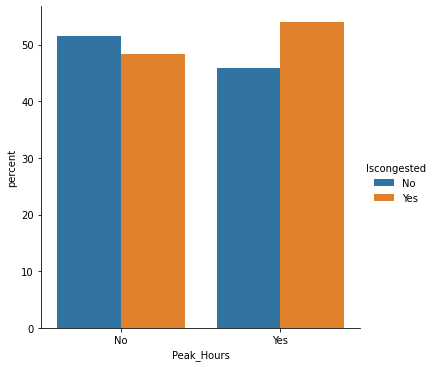

In [73]:
x,y = 'Peak_Hours', 'Iscongested'

(t
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

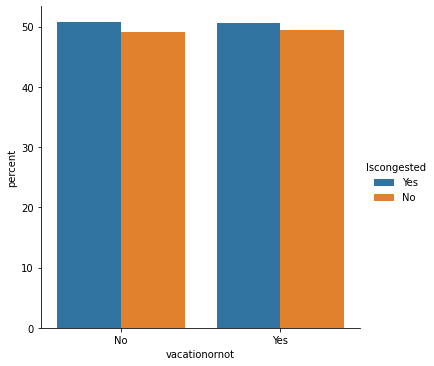

In [74]:
x,y = 'vacationornot', 'Iscongested'

(t
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

#### Finding outliers in data

In [75]:
import seaborn as sns

<AxesSubplot:xlabel='IntersectionId'>

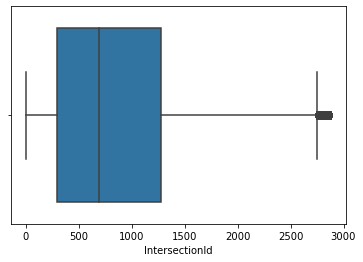

In [78]:
sns.boxplot(x = t['IntersectionId'])

<AxesSubplot:xlabel='Latitude'>

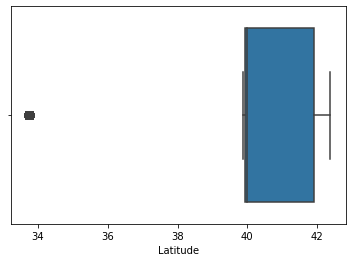

In [79]:
sns.boxplot(x = t['Latitude'])

<AxesSubplot:xlabel='Longitude'>

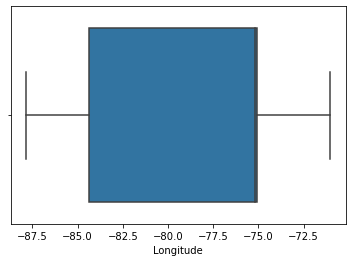

In [80]:
sns.boxplot(x = t['Longitude'])

In [81]:
t[(t['Hour'] > 23) | (t['Hour'] < 0)]['Hour'].count()

0

In [82]:
t[(t['Weekend'] != 0) | (t['Weekend'] != 1)]['Weekend'].count()

831704

In [83]:
t[t['Weekend'].isin([0, 1])]['Weekend'].count()

831704

In [84]:
t.shape

(831704, 38)

In [85]:
t[(t['Month'] > 12) | (t['Month'] < 1)]['Month'].count()

0

#### Exporting the data

In [ ]:
t.to_csv("C:/Users/Nikita Sivakumar/Downloads/data.csv", index = False)

#### Modelling

In [312]:
Y = t[["TotalTimeStopped_p20", "TotalTimeStopped_p50", "TotalTimeStopped_p80", "DistanceToFirstStop_p20","DistanceToFirstStop_p50", "DistanceToFirstStop_p80" ]]
X = t[[ "UNIIntersection", 'Latitude', 'Longitude',
         'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'EncodedEntryAddress', 'EncodedExitAddress', 'IfEntryEqualsExit',
       'Atlanta', 'Boston', 'Chicago', 'Philadelphia', 'Peak_Hours', 'vacationornot']]


In [313]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.2, random_state = 1)

##### Linear Regression

In [314]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_validate)

In [315]:
mean_squared_error(y_validate, y_pred)

5570.866691043546

In [316]:
rmse = np.sqrt(mean_squared_error(y_validate, y_pred))
rmse

74.63823879918085

In [317]:
r2_score(y_validate, y_pred)

0.031352613155265184

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_pred)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

In [ ]:
model.score(X_train, y_train)

In [ ]:
r2_score(y_train, y_pred)

##### Random forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50,max_depth=40,random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_pred)

In [ ]:
model.score(X_train, y_train)

In [ ]:
print(r2_score(y_train,y_pred))

In [342]:
model = RandomForestRegressor(n_estimators=50,max_depth=40,random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_validate)

In [343]:
mean_squared_error(y_validate, y_pred)

1914.325199268099

In [344]:
model.score(X_validate, y_validate)

0.6635275134953719

In [345]:
print(r2_score(y_validate,y_pred))

0.5133503413843262


In [346]:
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [347]:
model.feature_importances_

array([1.33835012e-01, 1.50081298e-01, 1.45014484e-01, 1.52279272e-01,
       7.53208882e-02, 1.38781649e-01, 2.28991551e-02, 8.27625338e-02,
       3.25905460e-02, 2.34070855e-02, 1.20337715e-02, 1.49795919e-04,
       5.65380099e-05, 1.71052601e-04, 2.91540583e-04, 1.36114881e-02,
       1.67138898e-02])

<BarContainer object of 17 artists>

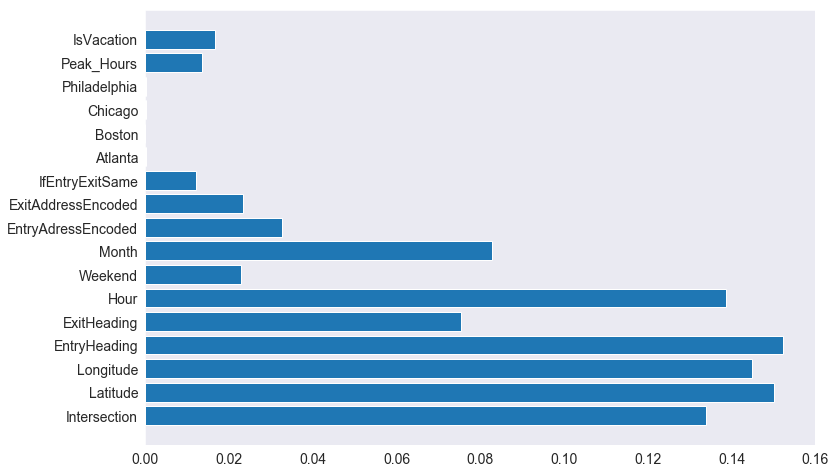

In [351]:
plt.barh(X.columns, model.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

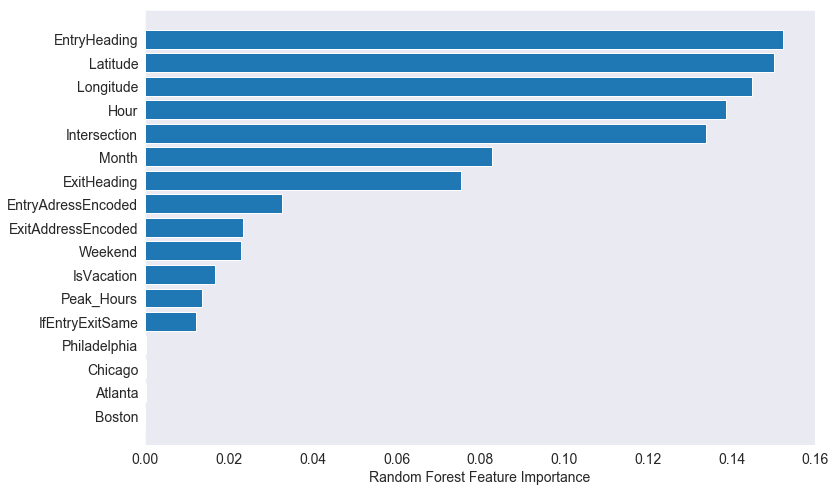

In [352]:
sid = model.feature_importances_.argsort()
plt.barh(X.columns[sid], model.feature_importances_[sid])
plt.xlabel("Random Forest Feature Importance")

##### XGBoost

In [ ]:
y1 = t[['TotalTimeStopped_p20']]
y2 = t[['TotalTimeStopped_p50']]
y3 = t[['TotalTimeStopped_p80']]
y4 = t[['DistanceToFirstStop_p20']]
y5 = t[['DistanceToFirstStop_p50']]
y6 = t[['DistanceToFirstStop_p80']]
X = t[[ 'IntersectionId', "UNIIntersection", 'Latitude', 'Longitude',
         'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'EncodedEntryAddress', 'EncodedExitAddress', 'IfEntryEqualsExit',
       'Atlanta', 'Boston', 'Chicago', 'Philadelphia']]
Y=t[["TotalTimeStopped_p20", "TotalTimeStopped_p50", "TotalTimeStopped_p80", "DistanceToFirstStop_p20","DistanceToFirstStop_p50", "DistanceToFirstStop_p80" ]]

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [118]:
y1=y_train[['TotalTimeStopped_p20']]
y11=y_test[['TotalTimeStopped_p20']]

In [273]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree=1,
                 gamma=0,                 
                 n_estimators=600,
                 learning_rate=0.4,
                 max_depth=7,
                 reg_alpha=0.75,
                 reg_lambda=0.7,
                 subsample=1)

In [274]:
model1 = regressor.fit(X_train, y1)
pred1=model1.predict(X_test)

In [275]:
mean_squared_error(y11,pred1)

32.954029806701065

In [276]:
print(r2_score(y11,pred1))

0.3467882082300249


In [ ]:
pred1=model1.predict(X_train)

In [ ]:
mean_squared_error(y1,pred1)

In [ ]:
print(r2_score(y11,pred1))

In [ ]:
model2 = regressor.fit(X_train, y2)
pred2=model2.predict(X_test)

model3 = regressor.fit(X_train, y3)
pred3=model3.predict(X_test)

model4 = regressor.fit(X_train, y4)
pred4=model4.predict(X_test)

model5 = regressor.fit(X_train, y5)
pred5=model5.predict(X_test)

model6 = regressor.fit(X_train, y6)
pred6=model6.predict(X_test)